# Describing Distributions
- Priscilla Cole
- November 2022

## In this assignment, you will be analyzing & visualizing several features in the Medical Dataset.

The features to analyze: 
- VitD_levels
- Doc_visits
- TotalCharge

For each feature listed:

- Plot a histogram with a kde (kernel density estimate)
- Add a line for the mean (red)
- Add a line for the median (green)
- Add a line for for +1 std from the mean (black)
- Add a line for the - 1 std from the mean (black)
- Highlight the range between +1 and =1 std (yellow)

Answer the following questions:
- Is it Discrete or Continuous?
- Does it have a skew? If so, which direction (+/-)
- What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
# load in the dataframe
med_df = pd.read_csv('Data/data (5).csv')
med_df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [3]:
# check general info and data types
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

# Analysis

In [4]:
# create function for histplot
def histplot(column_name, discrete=1):
    col = column_name
    feature = med_df[col]
    # measures of central tendency and dispersion
    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    plus_one_std = mean + std
    minus_one_std = mean - std
    fig,ax = plt.subplots(figsize=(8,4))
    if discrete == 0:
        sns.histplot(feature ,ax=ax, discrete=False, stat='probability', kde = True)
    else:    
        sns.histplot(feature ,ax=ax, discrete=True, stat='density', kde = True)
    ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
    ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
    ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
    ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
    ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
    ax.set_title(f'{col}')
    ax.legend();

In [5]:
# skew function
def skew_function(column_name):
    feature = med_df[column_name]
    mean = feature.mean()
    median = feature.median()
    if median < mean:
        print('There is a positive skew for this feature/column.')
    else:
        print('There is a negative skew for this feature/column.')

In [6]:
# kurtosis function
def kurtosis_function(column_name):
    kurt = stats.kurtosis(med_df[column_name], fisher= False)
    if kurt > 3:
        print(f'The kurtosis = {kurt} which is Leptokurtic.')       
    elif kurt < 3:
        print(f'The kurtosis = {kurt} which is Platykurtic.')      
    else:
        print(f'The kurtosis = {kurt} which means that it is Mesokurtic.') 

# VitD_Levels
- Discrete or continuous? Continuous 
- Is a skew present? If so, is it +/-? Negative
- What type of kurtosis? Leptokurtic, because it is more than 3.


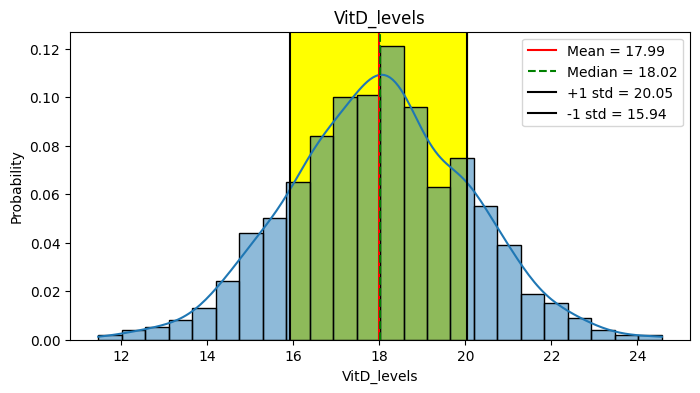

In [7]:
# VitD_levels
histplot('VitD_levels', 0)

In [8]:
# skew function
skew_function('VitD_levels')

There is a negative skew for this feature/column.


In [9]:
# kurtosis fuction
kurtosis_function('VitD_levels')

The kurtosis = 3.013147515833447 which is Leptokurtic.


# Doc_visits
- Discrete or continuous? Discrete
- Is a skew present? If so, is it +/-? Negative
- What type of kurtosis? Platykurtic, because the value is less than 3.

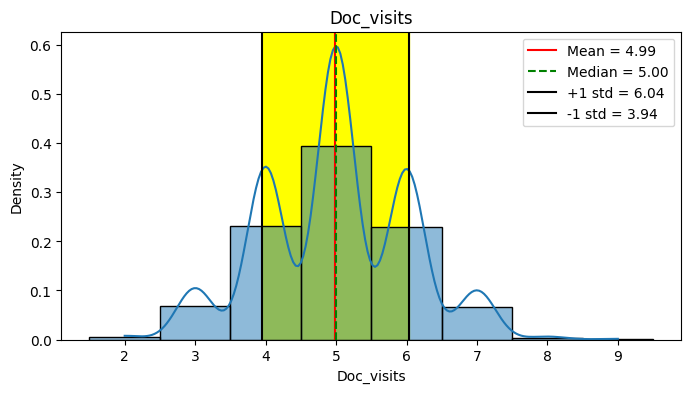

In [10]:
# Doc_visits
histplot('Doc_visits')

In [11]:
# skew function
skew_function('Doc_visits')

There is a negative skew for this feature/column.


In [12]:
# kurtosis function
kurtosis_function('Doc_visits')

The kurtosis = 2.9919958083381206 which is Platykurtic.


# TotalCharge
- Discrete or continuous? Continuous 
- Is a skew present? If so, is it +/-? Positive
- What type of kurtosis? Leptokurtic, because it is more than 3.

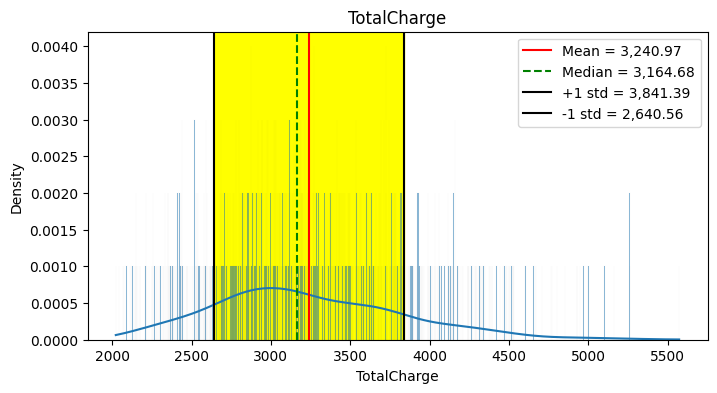

In [13]:
# TotalCharge
histplot('TotalCharge')

In [14]:
# skew function
skew_function('TotalCharge')

There is a positive skew for this feature/column.


In [15]:
# kurtosis function
kurtosis_function('TotalCharge')

The kurtosis = 3.2650077463439384 which is Leptokurtic.
